# Stock Prediction in Python
<img src="https://u.osu.edu/duska.7/files/2017/04/stock-market-3-21gyd1b.jpg">
<br> <br>
<li> For predicting Stocks, we are using the <b>LSTM </b> Technique </li>

In [22]:
#Downloading Modules
!pip install numpy
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install matplotlib
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 1.9 MB/s 
     |████████████████████████████████| 128 kB 9.6 MB/s 
     |████████████████████████████████| 112 kB 64.0 MB/s 
     |████████████████████████████████| 62 kB 967 kB/s 
     |████████████████████████████████| 4.0 MB 57.8 MB/s 
     |████████████████████████████████| 110 kB 68.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0

In [23]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

In [24]:
yf.pdr_override()

start = '2011-01-01'
end = '2021-12-31'
user_input = 'GOOGL'

df = pdr.get_data_yahoo(user_input , start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,14.926927,15.154905,14.926927,15.123874,15.123874,94513392
2011-01-04,15.155656,15.169670,15.018018,15.068068,15.068068,72907020
2011-01-05,15.016767,15.273524,15.016266,15.241992,15.241992,101190708
2011-01-06,15.282282,15.476226,15.266517,15.352853,15.352853,82229688
2011-01-07,15.413163,15.471722,15.268519,15.426426,15.426426,83963952


In [25]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,146.500000,148.243500,146.451996,146.916504,146.916504,26384000
2021-12-27,147.255997,148.343994,147.169495,147.906494,147.906494,15976000
2021-12-28,148.235992,148.298996,146.054504,146.686996,146.686996,18200000
2021-12-29,146.644501,147.417007,145.647507,146.654999,146.654999,17788000
2021-12-30,146.694000,147.300003,145.994507,146.200500,146.200500,15688000


In [26]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,14.926927,15.154905,14.926927,15.123874,15.123874,94513392
1,2011-01-04,15.155656,15.169670,15.018018,15.068068,15.068068,72907020
2,2011-01-05,15.016767,15.273524,15.016266,15.241992,15.241992,101190708
3,2011-01-06,15.282282,15.476226,15.266517,15.352853,15.352853,82229688
4,2011-01-07,15.413163,15.471722,15.268519,15.426426,15.426426,83963952


In [27]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,14.926927,15.154905,14.926927,15.123874,94513392
1,15.155656,15.169670,15.018018,15.068068,72907020
2,15.016767,15.273524,15.016266,15.241992,101190708
3,15.282282,15.476226,15.266517,15.352853,82229688
4,15.413163,15.471722,15.268519,15.426426,83963952


In [28]:
df.tail()

,Open,High,Low,Close,Volume
2763,146.500000,148.243500,146.451996,146.916504,26384000
2764,147.255997,148.343994,147.169495,147.906494,15976000
2765,148.235992,148.298996,146.054504,146.686996,18200000
2766,146.644501,147.417007,145.647507,146.654999,17788000
2767,146.694000,147.300003,145.994507,146.200500,15688000


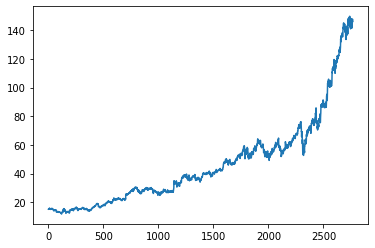

In [29]:
plt.plot(df.Close)

In [30]:
df

,Open,High,Low,Close,Volume
0,14.926927,15.154905,14.926927,15.123874,94513392
1,15.155656,15.169670,15.018018,15.068068,72907020
2,15.016767,15.273524,15.016266,15.241992,101190708
3,15.282282,15.476226,15.266517,15.352853,82229688
4,15.413163,15.471722,15.268519,15.426426,83963952
...,...,...,...,...,...
2763,146.500000,148.243500,146.451996,146.916504,26384000
2764,147.255997,148.343994,147.169495,147.906494,15976000
2765,148.235992,148.298996,146.054504,146.686996,18200000
2766,146.644501,147.417007,145.647507,146.654999,17788000


In [31]:
#moving average 100
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    142.237100
2764    142.364910
2765    142.469265
2766    142.578430
2767    142.671305
Name: Close, Length: 2768, dtype: float64

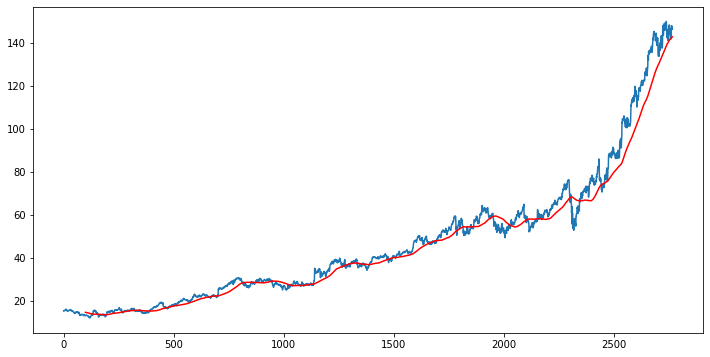

In [32]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [33]:
#moving average 100
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    129.919715
2764    130.146748
2765    130.366573
2766    130.578875
2767    130.789323
Name: Close, Length: 2768, dtype: float64

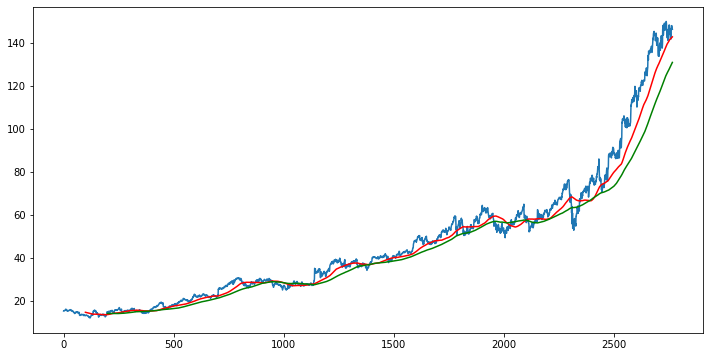

In [34]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [35]:
df.shape

(2768, 5)

In [36]:
#Spliting data into training and testing
data_training = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [37]:
data_training.head()

,Close
0,15.123874
1,15.068068
2,15.241992
3,15.352853
4,15.426426


In [38]:
data_testing.head()

,Close
1937,59.106998
1938,58.898998
1939,57.991501
1940,58.355499
1941,58.713501


In [39]:
#Scaling data for LSTM model to work on close values

#Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [40]:
data_training_array = scaler.fit_transform(data_training)
print(data_training_array)
print()
print(data_training_array.shape)

[[0.06184234]
 [0.06077716]
 [0.06409689]
 ...
 [0.89460039]
 [0.90884903]
 [0.89129837]]

(1937, 1)


In [41]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100 : i])
  y_train.append(data_training_array[i, 0]) #append(element, index)

#Converting x_train and y_train into numpy arrays:
x_train, y_train = np.array(x_train), np.array(y_train)

In [42]:
x_train.shape

(1837, 100, 1)

In [43]:
#Machine Learning Model

#Importing LSTM
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()

#Four Layers
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

#Dense Layer
model.add(Dense(units=1))

#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [44]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50) #epochs is number of iterations in one cycle

Epoch 1/50
58/58 [==============================] - 31s 435ms/step - loss: 0.0415
Epoch 2/50
58/58 [==============================] - 28s 488ms/step - loss: 0.0074
Epoch 3/50
58/58 [==============================] - 18s 318ms/step - loss: 0.0073
Epoch 4/50
58/58 [==============================] - 18s 317ms/step - loss: 0.0064
Epoch 5/50
58/58 [==============================] - 18s 318ms/step - loss: 0.0052
Epoch 6/50
58/58 [==============================] - 19s 322ms/step - loss: 0.0051
Epoch 7/50
58/58 [==============================] - 20s 351ms/step - loss: 0.0048
Epoch 8/50
58/58 [==============================] - 19s 319ms/step - loss: 0.0045
Epoch 9/50
58/58 [==============================] - 19s 322ms/step - loss: 0.0045
Epoch 10/50
58/58 [==============================] - 18s 318ms/step - loss: 0.0039
Epoch 11/50
58/58 [==============================] - 19s 319ms/step - loss: 0.0038
Epoch 12/50
58/58 [==============================] - 19s 324ms/step - loss: 0.0039
Epoch 13/50
5

In [45]:
model.save('keras_model.h5')

In [46]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index=True)
final_df.head()

<ipython-input-46-5333abc8927a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


,Close
0,53.690498
1,51.132000
2,51.149502
3,52.165501
4,51.572498


In [47]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04430194],
       [0.01887082],
       [0.01904478],
       [0.02914367],
       [0.02324931],
       [0.01685303],
       [0.02787135],
       [0.02056558],
       [0.0206898 ],
       [0.03296554],
       [0.0371701 ],
       [0.03673773],
       [0.05182642],
       [0.06003675],
       [0.05899803],
       [0.06059838],
       [0.0497987 ],
       [0.04941103],
       [0.04800456],
       [0.04222948],
       [0.04937129],
       [0.04504744],
       [0.05034043],
       [0.05008695],
       [0.04940606],
       [0.04144921],
       [0.04612096],
       [0.05731821],
       [0.07471297],
       [0.08367873],
       [0.08267479],
       [0.08065204],
       [0.07442472],
       [0.07357488],
       [0.07764521],
       [0.08126831],
       [0.0793002 ],
       [0.08719248],
       [0.08677501],
       [0.09885691],
       [0.09642662],
       [0.09910042],
       [0.09182942],
       [0.09175487],
       [0.07684011],
       [0.07353013],
       [0.06573728],
       [0.070

In [48]:
input_data.shape

(931, 1)

In [49]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100 : i])
  y_test.append(input_data[i,0])

#Converting x_test and y_test into numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [50]:
#Making Predictions
y_pred = model.predict(x_test)
y_pred.shape

26/26 [==============================] - 3s 95ms/step


(831, 1)

In [51]:
scaler.scale_

array([0.00993986])

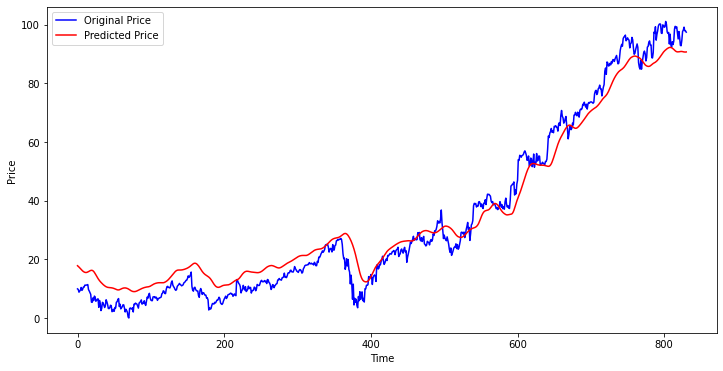

In [52]:
scale_factor = 1/0.00988704
y_pred *= scale_factor
y_test *= scale_factor 

plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_pred, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()